# STA 208: Homework 3 (Do not distribute)

## Due Monday 5/6/2019 at midnight

__Instructions:__ Submit it on canvas.  The canvas should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand when you hand it in.  Submit each file separately.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (10 pts)

Recall that surrogate losses for large margin classification take the form, $\phi(y_i x_i^\top \beta)$ where $y_i \in \{-1,1\}$ and $\beta, x_i \in \mathbb R^p$.

The following functions are used as surrogate losses for large margin classification.  Demonstrate if they are convex or not, and follow the instructions.

1. exponential loss: $\phi(x) = e^{-x}$
1. truncated quadratic loss: $\phi(x) = (\max\{1-x,0\})^2$
1. hinge loss: $\phi(x) = \max\{1-x,0\}$
1. sigmoid loss: $\phi(x) = 1 - \tanh(\kappa x)$, for fixed $\kappa > 0$
1. Plot these as a function of $x$.

(This problem is due to notes of Larry Wasserman.) 


In [359]:
import numpy as np
import matplotlib.pyplot as plt

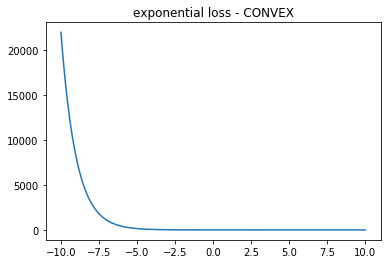

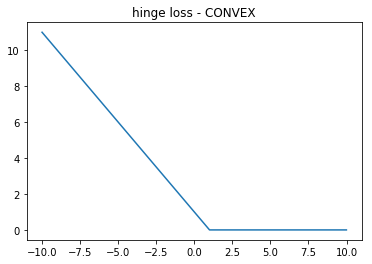

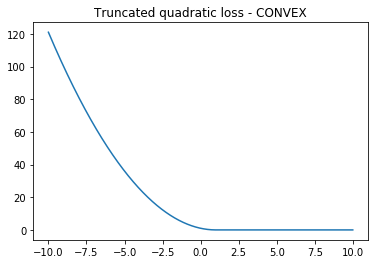

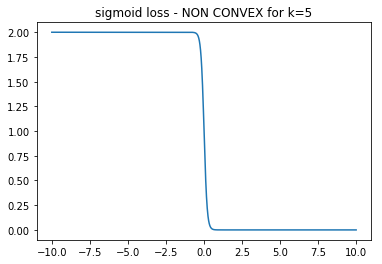

In [360]:
## Question 1
x= np.arange(-10,10,0.01)
#1 - exponential loss - CONVEX
y1 = np.exp(-x) 
plt.plot(x,y1)
plt.title('exponential loss - CONVEX')
plt.show()
#3 - hinge loss - CONVEX
y2 = np.maximum(1-x,0)
plt.plot(x,y2)
plt.title('hinge loss - CONVEX')
plt.show()
#2 Truncated quadratic loss - CONVEX
y3 = np.maximum(1-x,0)**2
plt.plot(x,y3)
plt.title('Truncated quadratic loss - CONVEX')
plt.show()
#4 sigmoid loss - NON CONVEX
k=5
y4 = 1 - np.tanh(k*x)
plt.plot(x,y4)
plt.title('sigmoid loss - NON CONVEX for k=5')
plt.show()


__Exercise 2__ (20 pts)

Consider the truncated quadratic loss from (1.1.2).  For brevity let $a_+ = max\{a,0\}$ denote the positive part of $a$.

$$\ell(y_i,x_i,\beta) = \phi(y_i x_i^\top \beta) = (1-y_i x_i^\top \beta)_+^2$$

1. Consider the empirical risk, $R_n$ (the average loss over a training set) for the truncated quadratic loss.  What is gradient of $R_n$ in $\beta$?  Does it always exists?
1. Demonstrate that the gradient does not have continuous derivative everywhere.
1. Recall that support vector machines used the hinge loss $(1 - y_i x_i^\top \beta)_+$ with a ridge regularization.  Write the regularized optimization method for the truncated quadratic loss, and derive the gradient of the regularized empirical risk.
1. In quasi-Newton methods a matrix ($Q$) that is a surrogate for the Hessian of the objective $L$ is used to determine step direction.

$$
\beta \gets \beta - Q^{-1} \nabla L(\beta)
$$


Because the loss does not have continuous Hessian, instead of the Newton method, we will use a quasi-Newton method that replaces the Hessian with a quasi-Hessian (another matrix that is meant to approximate the Hessian).  Consider the following quasi-Hessian of the regularized objective to be $$G(\beta) = \frac 1n \sum_i 2 (x_i x_i^\top 1\{ y_i x_i^\top \beta < 1 \}) + 2 \lambda I.$$  Demonstrate that the quasi-Hessian is positive definite, and write pseudo-code for quasi-Newton optimization, comment on the computational complexity of this method.

**Exercise 3 (20 pts)**

Consider the simulation below.

1. Implement minibatch stochastic gradient descent using the truncated quadratic loss.  Access the data by iteratively calling the ``sim_data`` method below.  

2. With minibatch size of $1$ (SGD).  Vary to learning schedule to be constant, decaying with $\eta_t \propto t^{-1/2}$, and $\eta_t \propto t^{-1}$.  Compare with normal noise (the ``noise_dis`` parm).

3. Vary the minibatch size to see the change in performance, with the best learning schedule from 2. When you compare two methods, make sure that you compare them with the same amount of data accessed (so use 1:10 ratio of iterations if you are comparing a minibatch ratio of 10:1).

4. Redo 2, 3 with ``noise_dis`` set to ``"chisquare"``.

In [463]:
class DataSimulator:
    """
    Simulate the data for linear classification
    """
    def __init__(self,p,noise_dist = "normal"):
        self.beta = np.random.normal(0,1,p)
        self.noise_dist = noise_dist
        self.p = p
        
    def sim_data(self,m = 1):
        p = self.p
        X = np.random.normal(0,1,(m,p))
        if self.noise_dist == "normal":
            eps = np.random.normal(0,1,m)
        if self.noise_dist == "chisquare":
            eps = np.random.chisquare(1,m)
        z = X @ self.beta + eps
        y = 1*(z > 0) + -1*(z<=0)
        return X, y

I fixed the labelling error.

In [464]:
m=10
p=10
ds = DataSimulator(p)
ds.sim_data(m=m)

(array([[ 0.37960844, -0.2315859 ,  1.20533331, -1.16502759,  0.11442363,
         -0.93844808, -2.13060343,  0.1007545 , -0.11123779,  0.84400429],
        [-1.61002183,  0.26293574,  0.74223971, -1.84605135,  1.96408779,
          0.06467089, -0.58533024,  0.703444  , -0.4130982 , -1.11314818],
        [-1.00724852,  0.71248096,  0.15577361,  0.3668484 , -0.9801126 ,
          0.87729017, -0.56966988, -0.46500901,  0.21485257, -0.57159546],
        [ 3.16138304,  1.020415  , -0.23082312, -1.54961511, -0.4948748 ,
          0.57178117, -2.17660436,  1.66375146, -0.39738097, -1.01991144],
        [ 0.66437332,  0.02205752,  0.15653238, -0.19437638, -1.25562291,
          0.31962964, -0.53342855, -1.44155348, -0.87292166,  0.15743649],
        [ 0.86360818,  1.2206635 ,  0.82405894, -0.46119034,  0.27327572,
          0.84792865,  1.05429798, -0.36740965,  0.53557624, -0.27467757],
        [-1.65356884, -1.23819985, -0.30266561,  0.57140984,  0.57610852,
         -0.59291356,  0.3694247

Beta : [ 0.44102696  0.80225204  0.54200355 -0.11638903 -0.55779686  0.5663286
  0.29685512 -0.12394632 -0.96607367  0.26206606]


Text(0, 0.5, 'MSE of beta')

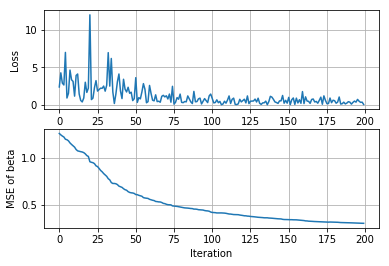

In [465]:
def loss(Xm,ym,beta,m,lamb):
    return np.sum((np.maximum(1-ym*(Xm@beta),0))**2)/m + (lamb/2)*beta.T@beta
    
def update_beta(Xm,ym,beta,m,lamb,eta):
    gradBeta = lamb*beta - (2/m)*(Xm.T)@(ym*(1-ym*(Xm@beta))*(ym*(Xm@beta)<1))
    return beta - eta*gradBeta

#iteratively train each minibatch and update the parameters
MSEbeta=[]
eta = 0.01
lamb = 0.0001 
Loss =[]

beta = np.random.normal(0,1,p)
for i in range(0,200):
    Xm,ym = ds.sim_data(m=10) #mini batch size = 10
    
    Loss.append(loss(Xm,ym,beta,m,lamb))
    
    beta = update_beta(Xm,ym,beta,m,lamb,eta**(1))
    MSEbeta.append(np.mean((beta - ds.beta)**2))

print('Beta :',beta)
plt.subplot(211)
plt.plot(np.arange(0,200),Loss)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(212)
plt.plot(np.arange(0,200),MSEbeta)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('MSE of beta')

Beta : [ 0.68052101  0.48746639  0.95037676 -0.12591169 -0.55310731  0.82595299
  0.29093115 -0.5144803  -0.80059646  0.49088046]


Text(0, 0.5, 'MSE of beta')

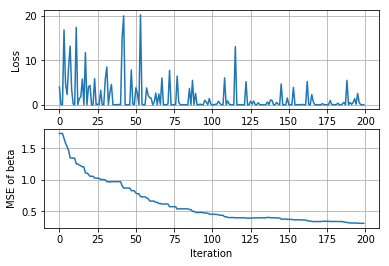

In [466]:
#2. m=1 case with the same function
#iteratively train each minibatch and update the parameters
m=1
MSEbeta=[]
eta = 0.01
lamb = 0.0001
Loss =[]
betafix = np.random.normal(0,1,p)
beta = betafix
for i in range(0,200):
    Xm,ym = ds.sim_data(m=m) #mini batch size = 10
    
    Loss.append(loss(Xm,ym,beta,m,lamb))
    
    beta = update_beta(Xm,ym,beta,m,lamb,eta)
    MSEbeta.append(np.mean((beta - ds.beta)**2))

print('Beta :',beta)
plt.subplot(211)
plt.plot(np.arange(0,200),Loss)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(212)
plt.plot(np.arange(0,200),MSEbeta)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('MSE of beta')


Text(0, 0.5, 'MSE of beta')

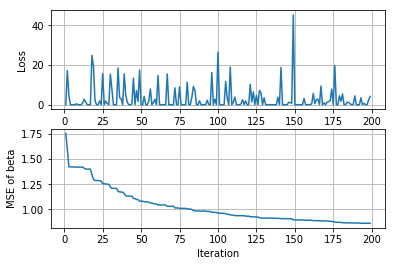

In [467]:
#2. m=1 case eta = t^(-1)
#teratively train each minibatch and update the parameters
m=1
MSEbeta2=[]
eta = 0.1
lamb = 0.0001
Loss =[]
alpha = 1
beta = betafix
for i in range(1,200):
    Xm,ym = ds.sim_data(m=m) #mini batch size = 10
    
    Loss.append(loss(Xm,ym,beta,m,lamb))
    
    beta = update_beta(Xm,ym,beta,m,lamb,eta*(i**(-1)))
    MSEbeta2.append(np.mean((beta - ds.beta)**2))

plt.subplot(211)
plt.plot(np.arange(1,200),Loss)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(212)
plt.plot(np.arange(1,200),MSEbeta2)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('MSE of beta')


Beta : [ 0.45006312  0.71765077  0.6698936  -0.00794151 -0.63160469  0.68779947
  0.23869302 -0.37325475 -0.98216104  0.22006496]


Text(0, 0.5, 'MSE of beta')

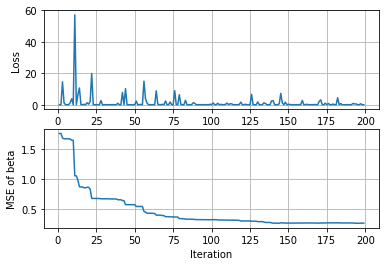

In [468]:
#2. m=1 case eta = t^(-1/2)
#iteratively train each minibatch and update the parameters
m=1
MSEbeta3=[]
eta = 0.1
lamb = 0.0001
Loss =[]
beta = betafix
for i in range(1,200):
    Xm,ym = ds.sim_data(m=m) #mini batch size = 10
    
    Loss.append(loss(Xm,ym,beta,m,lamb))
    
    beta = update_beta(Xm,ym,beta,m,lamb,eta*i**(-1/2))
    MSEbeta3.append(np.mean((beta - ds.beta)**2))

print('Beta :',beta)
plt.subplot(211)
plt.plot(np.arange(1,200),Loss)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(212)
plt.plot(np.arange(1,200),MSEbeta3)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('MSE of beta')


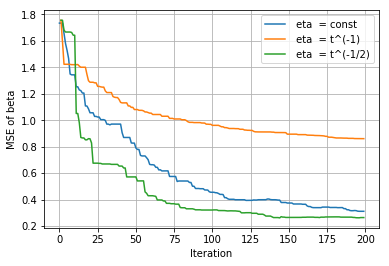

In [469]:
#compare the performance of different learning schedules starting from the same random beta initialization
plt.plot(np.arange(0,200),MSEbeta,label = ' eta  = const')
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('MSE of beta')
plt.plot(np.arange(1,200),MSEbeta2,label = ' eta  = t^(-1)')
plt.xlabel('Iteration')
plt.ylabel('MSE of beta')
plt.gca().legend()
plt.plot(np.arange(1,200),MSEbeta3,label = ' eta  = t^(-1/2)')
plt.xlabel('Iteration')
plt.ylabel('MSE of beta')
plt.gca().legend()

Out of the tested learning schedulings, $t^{-2}$ eta performs better than all the other methods and the results are higly dependant on the samples for each iteration. And again depends on the proportionality constant of the learning rate. For the evaluation all the methods use the same random initialization for the $\beta$ values.

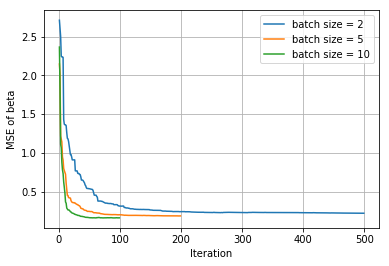

In [474]:
#Comparing minibatch size with selected rate
batchsize = np.array([2,5,10]).astype('int')
iterations = 1000/batchsize

iterations = iterations.astype('int')


MSEbeta=[]
eta = np.array([0.1,0.2,0.3])
lamb = 0.0001
Loss =[]
betafix = np.random.normal(0,1,p)
for j in  range(0,batchsize.shape[0]):
    MSEbetaj=[]
    beta = betafix 
    m = batchsize[j]
    etaj = eta[j]
    for i in range(1,iterations[j]):
        Xm,ym = ds.sim_data(m=m) #mini batch size = 10

        Loss.append(loss(Xm,ym,beta,m,lamb))

        beta = update_beta(Xm,ym,beta,m,lamb,etaj*i**(-1/2))
        MSEbetaj.append(np.mean((beta - ds.beta)**2))
        
    MSEbeta.append(MSEbetaj)

for j in  range(0,batchsize.shape[0]):
    plt.plot(np.arange(1,iterations[j]),MSEbeta[j],label = 'batch size = '+ str(batchsize[j]))
    
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('MSE of beta')
plt.gca().legend()





Larger batch sizes converges faster with higher learning rates.

In [481]:
#Repeating the experiment for chi-square noise
p=10
ds = DataSimulator(p,noise_dist = "chisquare")

Beta : [-0.12633644 -0.03808693  0.10726152 -0.15952522 -0.09664428 -0.53811363
 -0.64152487 -0.38422146 -0.15800859  0.0643539 ]


Text(0, 0.5, 'MSE of beta')

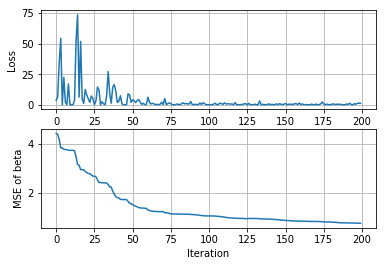

In [482]:
##2. m=1 case with the same function
#iteratively train each minibatch and update the parameters
m=1
MSEbeta=[]
eta = 0.01
lamb = 0.0001
Loss =[]
betafix = np.random.normal(0,1,p)
beta = betafix
for i in range(0,200):
    Xm,ym = ds.sim_data(m=m) #mini batch size = 10
    
    Loss.append(loss(Xm,ym,beta,m,lamb))
    
    beta = update_beta(Xm,ym,beta,m,lamb,eta)
    MSEbeta.append(np.mean((beta - ds.beta)**2))

print('Beta :',beta)
plt.subplot(211)
plt.plot(np.arange(0,200),Loss)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(212)
plt.plot(np.arange(0,200),MSEbeta)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('MSE of beta')



Text(0, 0.5, 'MSE of beta')

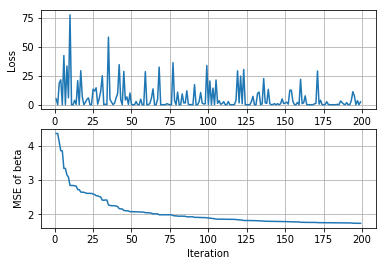

In [483]:
#2. m=1 case eta = t^(-1)
#teratively train each minibatch and update the parameters
m=1
MSEbeta2=[]
eta = 0.1
lamb = 0.0001
Loss =[]
alpha = 1
beta = betafix
for i in range(1,200):
    Xm,ym = ds.sim_data(m=m) #mini batch size = 10
    
    Loss.append(loss(Xm,ym,beta,m,lamb))
    
    beta = update_beta(Xm,ym,beta,m,lamb,eta*(i**(-1)))
    MSEbeta2.append(np.mean((beta - ds.beta)**2))

plt.subplot(211)
plt.plot(np.arange(1,200),Loss)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(212)
plt.plot(np.arange(1,200),MSEbeta2)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('MSE of beta')


Beta : [-0.18553546  0.10128834 -0.20743195  0.10536065  0.01717468 -0.85791054
 -1.25793755 -1.02477455 -0.23539136  0.62187874]


Text(0, 0.5, 'MSE of beta')

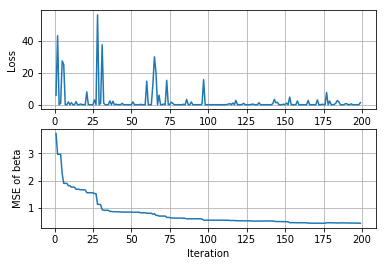

In [484]:
#2. m=1 case eta = t^(-1/2)
#iteratively train each minibatch and update the parameters
m=1
MSEbeta3=[]
eta = 0.1
lamb = 0.0001
Loss =[]
beta = betafix
for i in range(1,200):
    Xm,ym = ds.sim_data(m=m) #mini batch size = 10
    
    Loss.append(loss(Xm,ym,beta,m,lamb))
    
    beta = update_beta(Xm,ym,beta,m,lamb,eta*i**(-1/2))
    MSEbeta3.append(np.mean((beta - ds.beta)**2))

print('Beta :',beta)
plt.subplot(211)
plt.plot(np.arange(1,200),Loss)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(212)
plt.plot(np.arange(1,200),MSEbeta3)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('MSE of beta')



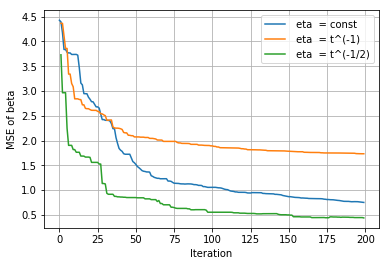

In [485]:
#compare the performance of different learning schedules starting from the same random beta initialization
plt.plot(np.arange(0,200),MSEbeta,label = ' eta  = const')
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('MSE of beta')
plt.plot(np.arange(1,200),MSEbeta2,label = ' eta  = t^(-1)')
plt.xlabel('Iteration')
plt.ylabel('MSE of beta')
plt.gca().legend()
plt.plot(np.arange(1,200),MSEbeta3,label = ' eta  = t^(-1/2)')
plt.xlabel('Iteration')
plt.ylabel('MSE of beta')
plt.gca().legend()

conclusions are same as for the normal case

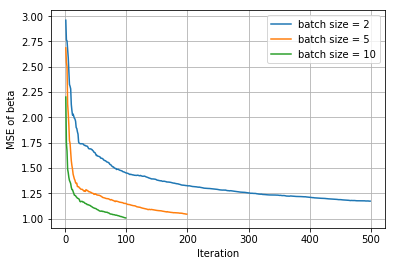

In [480]:
#Comparing minibatch size with selected rate
batchsize = np.array([2,5,10]).astype('int')
iterations = 1000/batchsize

iterations = iterations.astype('int')


MSEbeta=[]
eta = np.array([0.1,0.2,0.3])
lamb = 0.0001
Loss =[]
betafix = np.random.normal(0,1,p)
for j in  range(0,batchsize.shape[0]):
    MSEbetaj=[]
    beta = betafix 
    m = batchsize[j]
    etaj = eta[j]
    for i in range(1,iterations[j]):
        Xm,ym = ds.sim_data(m=m) #mini batch size = 10

        Loss.append(loss(Xm,ym,beta,m,lamb))

        beta = update_beta(Xm,ym,beta,m,lamb,etaj*i**(-1/2))
        MSEbetaj.append(np.mean((beta - ds.beta)**2))
        
    MSEbeta.append(MSEbetaj)

for j in  range(0,batchsize.shape[0]):
    plt.plot(np.arange(1,iterations[j]),MSEbeta[j],label = 'batch size = '+ str(batchsize[j]))
    
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('MSE of beta')
plt.gca().legend()

Conclusions are consistent.

__Exercise 4.__ (50 pts) 

Text data can be converted into vector data through a vectorization operation.  A corpus is a collection of documents and the dictionary is all of the words in the corpus.  Bag-of-words models will treat each document as a set of words, ignoring the order of the words.  Then a simple vectorizer will let $X_{i,j}$ be the number of times the $j$th word is in the $i$th document.  Two vectorizers are ``sklearn.feature_extraction.text.CountVectorizer`` and ``sklearn.feature_extraction.text.TfidfVectorizer``.

Below is an import of a reuters dataset.  I have written a def to process a single file.  Construct a response variable that has three categories, if the topic is 'earn', 'acq', or another category.  Import all of the data and construct two sparse vectorized matrices---look at ``scipy.sparse``---based on the two above vectorizations.  Use sklearn svm.SVC on the TRAIN split and predict on the TEST split.  Plot your ROC and PR curves for predicting 'earn' (versus everything else); tune the kernel and C parameters.  Do the same for predicting 'acq' versus everything else.  Write a paragraph summarizing the performance and tuning.

In [558]:
from lxml import html, etree
import numpy as np
from sklearn import model_selection,svm,metrics
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [559]:
files=['reut2-000.sgm','reut2-001.sgm','reut2-002.sgm','reut2-003.sgm','reut2-004.sgm','reut2-005.sgm','reut2-006.sgm','reut2-007.sgm','reut2-008.sgm','reut2-009.sgm','reut2-010.sgm','reut2-011.sgm','reut2-012.sgm','reut2-013.sgm','reut2-014.sgm','reut2-015.sgm','reut2-016.sgm','reut2-017.sgm','reut2-018.sgm','reut2-019.sgm','reut2-020.sgm','reut2-021.sgm']
reu=[]
for file in files:
    reu.append(html.parse('reuters/'+file))
del files


In [560]:
import nltk
nltk.download()
# Download Corpora -> stopwords, Models -> punkt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [561]:
def parse_reu(reu):
    """Parses the etree object and returns a list of dictionary of reuters attr
    Output: {'topics': the topic of the article, 'places': where it is located, 
        'split': training/test split, 'body':the text of the article as a set of words with stopwords removed}
    """
    root= reu.getroot()
    articles = root.body.getchildren()
    stop_words = set(stopwords.words('english'))
    reu_pl = []
    for a in articles:
        reu_parse = {}
        if a.attrib['topics'] != 'YES':
            next
        topics = a.find('topics').findall('d')
        if topics:
            reu_parse['topics'] = [t.text for t in topics]
        else:
            reu_parse['topics'] = []
        places = a.find('places').findall('d')
        if places:
            reu_parse['places'] = [t.text for t in places]
        reu_parse['split'] = a.attrib['lewissplit']
        rtxt = a.find('text')
        word_tokens = word_tokenize(rtxt.text_content())
        filtered_sentence = set([w.lower() for w in word_tokens if not w in stop_words])
        reu_parse['body'] = filtered_sentence
        reu_pl.append(reu_parse)
    return reu_pl

In [562]:
reu_pl = parse_reu(reu[0])

In [563]:
#for i in reu:
#    reu_pl = parse_reu(i)
#    print('lenght of a parse:',len(reu_pl))

print(reu_pl[0]['topics'])
print(reu_pl[0]['places'])
print(" ".join(reu_pl[0]['body']))
print(reu_pl[0]['split']=='TRAIN')



['cocoa']
['el-salvador', 'usa', 'uruguay']
zone 0.39 carnival oct/dec ended limited may 2,375 april/may july june/july old figures standing view farmers new come fob 27 processors 5.81 prices said total seems shippers reluctant 4,340 buyers throughout end 22 sold 753 ends midday drought rose covertible 5.93 estimates 26 times reuter harvesting 4,351 spot although 155,221 published cocoa hands continued went arrivals week , good ports late 2,400 booked per normal 4,450 stage salvador convertible year weekly 4,350 routine crop 28 the thousand fit made export named certificates tonne cake brazilian comissaria 6.2 middlemen early humidity review 350 shipment experiencing butter making earlier sept lower quality 340 . cruzados temporao practically 1,850 dry offer trade going weeks +bahia aug expected 2,380 restored dificulties 6.13 areas sales delivered 1,780 1,870 kilos currency light 1,880 destinations superior+ aug/sept estimated 45 means 995 4,400 feb part 1,750 dlrs open prospects imp

In [564]:
#Condtruct the dataset to a single list
data =[]
for i in reu:
    reu_pl = parse_reu(i)
    data = data+reu_pl
    #print('lenght of a parse:',len(data))

In [565]:
body = []
for doc in data:
    body.append(' '.join(doc['body']))

print(body[0])

zone 0.39 carnival oct/dec ended limited may 2,375 april/may july june/july old figures standing view farmers new come fob 27 processors 5.81 prices said total seems shippers reluctant 4,340 buyers throughout end 22 sold 753 ends midday drought rose covertible 5.93 estimates 26 times reuter harvesting 4,351 spot although 155,221 published cocoa hands continued went arrivals week , good ports late 2,400 booked per normal 4,450 stage salvador convertible year weekly 4,350 routine crop 28 the thousand fit made export named certificates tonne cake brazilian comissaria 6.2 middlemen early humidity review 350 shipment experiencing butter making earlier sept lower quality 340 . cruzados temporao practically 1,850 dry offer trade going weeks +bahia aug expected 2,380 restored dificulties 6.13 areas sales delivered 1,780 1,870 kilos currency light 1,880 destinations superior+ aug/sept estimated 45 means 995 4,400 feb part 1,750 dlrs open prospects improving season march/april 2,325 exporters de

In [566]:
#create the sparse metices


vectorizer = CountVectorizer()
Xc = vectorizer.fit_transform(body)
#print(vectorizer.get_feature_names())
print(Xc.toarray().shape)


vectorizer = TfidfVectorizer()
Xtd = vectorizer.fit_transform(body)
#print(vectorizer.get_feature_names())
print(Xtd.shape)

del body

(21578, 48369)
(21578, 48369)


In [568]:
#Train and test split for earn
ClassC=[]

for doc in data:
    if('earn' in doc['topics']):
        label=1
    else:
        label=0
    ClassC.append(label)

ClassC = np.array(ClassC)

## split data to train and test
Xc_tr, Xc_te, yc_tr, yc_te = model_selection.train_test_split(Xc,ClassC,test_size=0.2, random_state=1)
#split again to aget a validation set
Xc_tr, Xc_val, yc_tr, yc_val = model_selection.train_test_split(Xc_tr,yc_tr,test_size=0.2, random_state=1)

#do the same for other vectorizer as well.
Xtd_tr, Xtd_te, ytd_tr, ytd_te = model_selection.train_test_split(Xtd,ClassC,test_size=0.2, random_state=1)
Xtd_tr, Xtd_val, ytd_tr, ytd_val = model_selection.train_test_split(Xtd_tr,ytd_tr,test_size=0.2, random_state=1)

In [569]:
#see the splits
del ClassC
del Xc
del Xtd
Xc_tr.shape, Xc_val.shape, yc_val.shape, yc_val.shape, yc_te.shape, yc_te.shape,


((13809, 48369), (3453, 48369), (3453,), (3453,), (4316,), (4316,))

In [542]:
#1. Earn Vs everything else
yc_trEarn = yc_tr.astype('int')
yc_teEarn =  yc_te.astype('int')
yc_valEarn = yc_val.astype('int')

In [503]:
#SVC for linear  - MSE calculated using the val set.
F1=[]
AUC=[]
MSEval =[]
MSEtr = []
#plt.figure(figsize=(6,6))
C= np.arange(0.01,0.5,0.05)
for c in C:
    print(c)
    svm_sim = svm.SVC(kernel="linear",C=c,gamma='auto')
    svm_sim.fit(Xc_tr,yc_trEarn)
    
    yc_hatEarnv = svm_sim.predict(Xc_val)
    yc_hatEarntr = svm_sim.predict(Xc_tr)
    #fpr_dur, tpr_dur, threshs = metrics.roc_curve(yc_teEarn,yc_hatEarn)

    #plt.plot(fpr_dur,tpr_dur)
    
    MSEval.append(np.mean(yc_hatEarnv - yc_valEarn)**2)
    MSEtr.append(np.mean(yc_hatEarntr - yc_trEarn)**2)
    
#F1.append(metrics.f1_score(yc_teEarn,yc_hatEarn))
#AUC.append(metrics.roc_auc_score(yc_teEarn,yc_hatEarn))


0.01
0.060000000000000005
0.11
0.16000000000000003
0.21000000000000002
0.26
0.31000000000000005
0.36000000000000004
0.41000000000000003
0.46


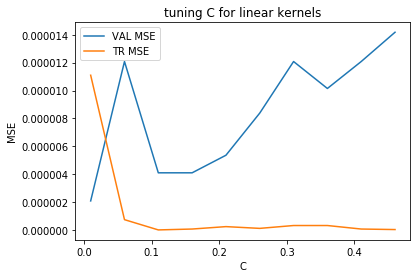

In [505]:
plt.plot(C,MSEval,label='VAL MSE')
plt.plot(C,MSEtr,label='TR MSE')
plt.xlabel('C')
plt.ylabel('MSE')
plt.title("tuning C for linear kernels")
plt.gca().legend()

Best C value for lowest val MSE is C = 0.16

In [506]:
#SVC for polynomial 
MSEval =[]
MSEtr = []
#plt.figure(figsize=(6,6))
C= np.arange(4,12,1)
for c in C:
    print(c)
    svm_sim = svm.SVC(kernel="poly",C=c,gamma='scale')
    svm_sim.fit(Xc_tr,yc_trEarn)
    
    yc_hatEarnv = svm_sim.predict(Xc_val)
    yc_hatEarntr = svm_sim.predict(Xc_tr)
    #fpr_dur, tpr_dur, threshs = metrics.roc_curve(yc_teEarn,yc_hatEarn)

    #plt.plot(fpr_dur,tpr_dur)
    
    MSEval.append(np.mean(yc_hatEarnv - yc_valEarn)**2)
    MSEtr.append(np.mean(yc_hatEarntr - yc_trEarn)**2)


4
5
6
7
8
9
10
11


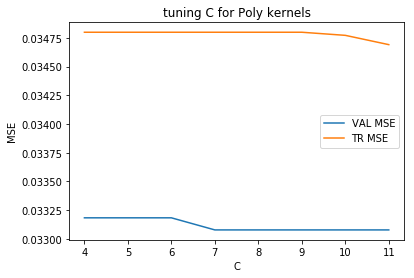

In [507]:
plt.plot(C,MSEval,label='VAL MSE')
plt.plot(C,MSEtr,label='TR MSE')
plt.xlabel('C')
plt.ylabel('MSE')
plt.title("tuning C for Poly kernels")
plt.gca().legend()

ROC curve is a diagonal line for polynimial kernels. And no effective training.

In [508]:
#SVC for rbf 
MSEval =[]
MSEtr = []
#plt.figure(figsize=(6,6))
C= np.arange(4,12,1)
for c in C:
    print(c)
    svm_sim = svm.SVC(kernel="rbf",C=c,gamma='auto')
    svm_sim.fit(Xc_tr,yc_trEarn)
    
    yc_hatEarnv = svm_sim.predict(Xc_val)
    yc_hatEarntr = svm_sim.predict(Xc_tr)
    #fpr_dur, tpr_dur, threshs = metrics.roc_curve(yc_teEarn,yc_hatEarn)

    #plt.plot(fpr_dur,tpr_dur)
    
    MSEval.append(np.mean(yc_hatEarnv - yc_valEarn)**2)
    MSEtr.append(np.mean(yc_hatEarntr - yc_trEarn)**2)
    
    


4
5
6
7
8
9
10
11


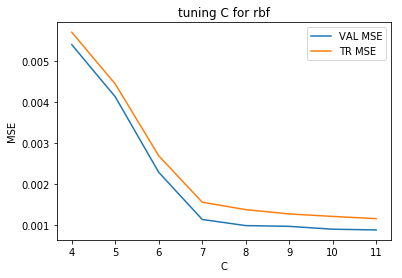

In [509]:
plt.plot(C,MSEval,label='VAL MSE')
plt.plot(C,MSEtr,label='TR MSE')
plt.xlabel('C')
plt.ylabel('MSE')
plt.title("tuning C for rbf")
plt.gca().legend()

Best value of Val MSE occurs when C>11.

In [510]:
#SVC for sigmoid 
F1=[]
AUC=[]
#plt.figure(figsize=(6,6))
C= np.arange(4,12,1)
for c in C:
    print(c)
    svm_sim = svm.SVC(kernel="sigmoid",C=c,gamma='auto')
    svm_sim.fit(Xc_tr,yc_trEarn)
    
    yc_hatEarnv = svm_sim.predict(Xc_val)
    yc_hatEarntr = svm_sim.predict(Xc_tr)
    #fpr_dur, tpr_dur, threshs = metrics.roc_curve(yc_teEarn,yc_hatEarn)

    #plt.plot(fpr_dur,tpr_dur)
    
    MSEval.append(np.mean(yc_hatEarnv - yc_valEarn)**2)
    MSEtr.append(np.mean(yc_hatEarntr - yc_trEarn)**2)

4
5
6
7
8
9
10
11


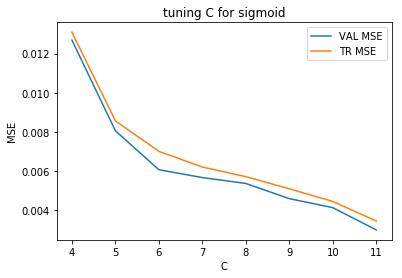

In [512]:
plt.plot(C,MSEval[8:],label='VAL MSE')
plt.plot(C,MSEtr[8:],label='TR MSE')
plt.xlabel('C')
plt.ylabel('MSE')
plt.title("tuning C for sigmoid")
plt.gca().legend()

Best value for C for sigmoid kernels is C > 11

F1 for linear: 0.9159120310478654
AUC for linear: 0.9447623886049584
F1 for rbf: 0.8121468926553673
AUC for rbf: 0.8592995772162856
F1 for sigmoid: 0.789433962264151
AUC for sigmoid: 0.8315693221999805


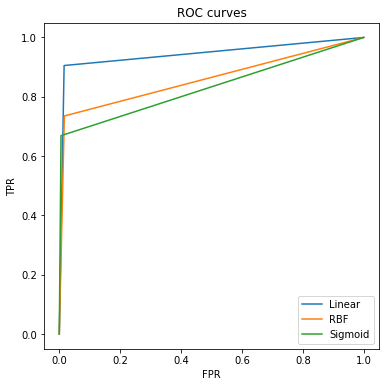

In [543]:
plt.figure(figsize=(6,6))
#compare the kernels for at their best C values
svm_sim = svm.SVC(kernel="linear",C=0.15,gamma='auto')
svm_sim.fit(Xc_tr,yc_trEarn)
    
yc_hatEarn = svm_sim.predict(Xc_te)
fpr_dur, tpr_dur, threshs = metrics.roc_curve(yc_teEarn,yc_hatEarn)
plt.plot(fpr_dur,tpr_dur,label='Linear')
print('F1 for linear:',metrics.f1_score(yc_teEarn,yc_hatEarn))
print('AUC for linear:',metrics.roc_auc_score(yc_teEarn,yc_hatEarn))

svm_sim = svm.SVC(kernel="rbf",C=12,gamma='auto')
svm_sim.fit(Xc_tr,yc_trEarn)
    
yc_hatEarn = svm_sim.predict(Xc_te)
fpr_dur, tpr_dur, threshs = metrics.roc_curve(yc_teEarn,yc_hatEarn)
plt.plot(fpr_dur,tpr_dur,label='RBF')
print('F1 for rbf:',metrics.f1_score(yc_teEarn,yc_hatEarn))
print('AUC for rbf:',metrics.roc_auc_score(yc_teEarn,yc_hatEarn))

svm_sim = svm.SVC(kernel="sigmoid",C=12,gamma='auto')
svm_sim.fit(Xc_tr,yc_trEarn)
    
yc_hatEarn = svm_sim.predict(Xc_te)
fpr_dur, tpr_dur, threshs = metrics.roc_curve(yc_teEarn,yc_hatEarn)
plt.plot(fpr_dur,tpr_dur,label='Sigmoid')
print('F1 for sigmoid:',metrics.f1_score(yc_teEarn,yc_hatEarn))
print('AUC for sigmoid:',metrics.roc_auc_score(yc_teEarn,yc_hatEarn))


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC curves")
plt.gca().legend()

Linear kernels with C=0.15 performs the best.(Based on training and validation error). The above is the ROC curves for differet kernels for the test set at their best C values.

Now assume that we have tuned the C parameter for the kernels becuse it takes so much time for trining.
Lets plot the ROC and PR curves for EARN and ACC variables. Linear kenels performs best.

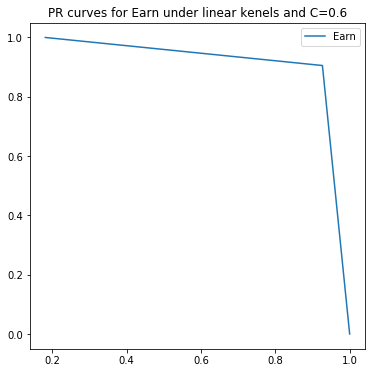

In [545]:
#PR curve for Linear kernel
##Generate PR curves for Earn
plt.figure(figsize=(6,6))

#EARN of Xc
svm_sim = svm.SVC(kernel="linear",C=0.15,gamma='auto')
svm_sim.fit(Xc_tr,yc_trEarn)
    
yc_hatEarn = svm_sim.predict(Xc_te)
fpr_dur, tpr_dur, threshs = metrics.precision_recall_curve(yc_teEarn,yc_hatEarn)
plt.plot(fpr_dur,tpr_dur,label='Earn')

plt.title("PR curves for Earn under linear kenels and C=0.6")
plt.gca().legend()

In [546]:
#Train and test split for acq
ClassC=[]

for doc in data:
    if('acq' in doc['topics']):
        label=1
    else:
        label=0
    ClassC.append(label)

ClassC = np.array(ClassC)

## split data to train and test
Xc_tr, Xc_te, yc_tr, yc_te = model_selection.train_test_split(Xc,ClassC,test_size=0.2, random_state=1)
#split again to aget a validation set
Xc_tr, Xc_val, yc_tr, yc_val = model_selection.train_test_split(Xc_tr,yc_tr,test_size=0.2, random_state=1)

#do the same for other vectorizer as well.
Xtd_tr, Xtd_te, ytd_tr, ytd_te = model_selection.train_test_split(Xtd,ClassC,test_size=0.2, random_state=1)
Xtd_tr, Xtd_val, ytd_tr, ytd_val = model_selection.train_test_split(Xtd_tr,ytd_tr,test_size=0.2, random_state=1)

In [548]:
#1. ACQ Vs everything else
yc_trEarn = yc_tr.astype('int')
yc_teEarn =  yc_te.astype('int')
yc_valEarn = yc_val.astype('int')

F1 for linear: 0.8153005464480875
AUC for linear: 0.8784320429699801
F1 for rbf: 0.02857142857142857
AUC for rbf: 0.5072463768115942
F1 for sigmoid: 0.0
AUC for sigmoid: 0.5


C:\Users\Lahiru D. Chamain\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


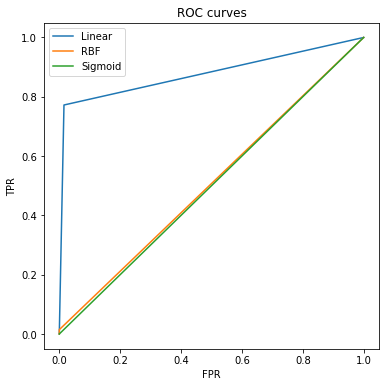

In [549]:
################# ROC for ACQ variable
plt.figure(figsize=(6,6))
#compare the kernels for at their best C values
svm_sim = svm.SVC(kernel="linear",C=0.15,gamma='auto')
svm_sim.fit(Xc_tr,yc_trEarn)
    
yc_hatEarn = svm_sim.predict(Xc_te)
fpr_dur, tpr_dur, threshs = metrics.roc_curve(yc_teEarn,yc_hatEarn)
plt.plot(fpr_dur,tpr_dur,label='Linear')
print('F1 for linear:',metrics.f1_score(yc_teEarn,yc_hatEarn))
print('AUC for linear:',metrics.roc_auc_score(yc_teEarn,yc_hatEarn))

svm_sim = svm.SVC(kernel="rbf",C=12,gamma='auto')
svm_sim.fit(Xc_tr,yc_trEarn)
    
yc_hatEarn = svm_sim.predict(Xc_te)
fpr_dur, tpr_dur, threshs = metrics.roc_curve(yc_teEarn,yc_hatEarn)
plt.plot(fpr_dur,tpr_dur,label='RBF')
print('F1 for rbf:',metrics.f1_score(yc_teEarn,yc_hatEarn))
print('AUC for rbf:',metrics.roc_auc_score(yc_teEarn,yc_hatEarn))

svm_sim = svm.SVC(kernel="sigmoid",C=12,gamma='auto')
svm_sim.fit(Xc_tr,yc_trEarn)
    
yc_hatEarn = svm_sim.predict(Xc_te)
fpr_dur, tpr_dur, threshs = metrics.roc_curve(yc_teEarn,yc_hatEarn)
plt.plot(fpr_dur,tpr_dur,label='Sigmoid')
print('F1 for sigmoid:',metrics.f1_score(yc_teEarn,yc_hatEarn))
print('AUC for sigmoid:',metrics.roc_auc_score(yc_teEarn,yc_hatEarn))


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC curves")
plt.gca().legend()

Linear methods performs best for ACQ as well.

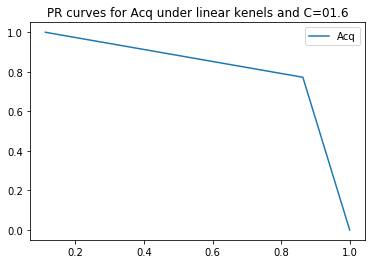

In [529]:

#ACQ of Xc
svm_sim = svm.SVC(kernel="linear",C=0.15,gamma='auto')
svm_sim.fit(Xc_tr,yc_tr)
    
yc_hatAcq = svm_sim.predict(Xc_te)
fpr_dur, tpr_dur, threshs = metrics.precision_recall_curve(yc_te,yc_hatAcq)
plt.plot(fpr_dur,tpr_dur,label='Acq')


plt.title("PR curves for Acq under linear kenels and C=01.6")
plt.gca().legend()

In [570]:
#Lets analyse sklearn.feature_extraction.text.TfidfVectorizer
ytd_trEarn = ytd_tr.astype('int')
ytd_teEarn =  ytd_te.astype('int')
ytd_valEarn = ytd_val.astype('int')

F1 for linear EARN: 0.860776439089692
AUC for linear EARN: 0.9013630106947924


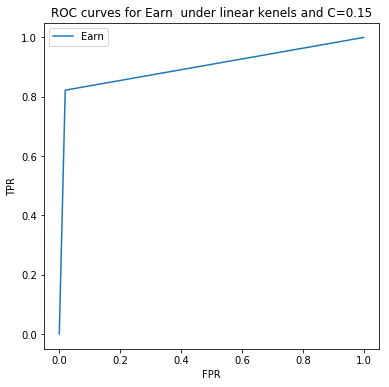

In [571]:
##Generate ROC curves for Earn 
plt.figure(figsize=(6,6))
#1. Earn Vs everything else
#EARN of Xtd
svm_sim = svm.SVC(kernel="linear",C=0.15,gamma='auto')
svm_sim.fit(Xtd_tr,ytd_trEarn)
    
ytd_hatEarn = svm_sim.predict(Xtd_te)
fpr_dur, tpr_dur, threshs = metrics.roc_curve(ytd_teEarn,ytd_hatEarn)
plt.plot(fpr_dur,tpr_dur,label='Earn')
print('F1 for linear EARN:',metrics.f1_score(ytd_teEarn,ytd_hatEarn))
print('AUC for linear EARN:',metrics.roc_auc_score(ytd_teEarn,ytd_hatEarn))


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC curves for Earn  under linear kenels and C=0.15")
plt.gca().legend()

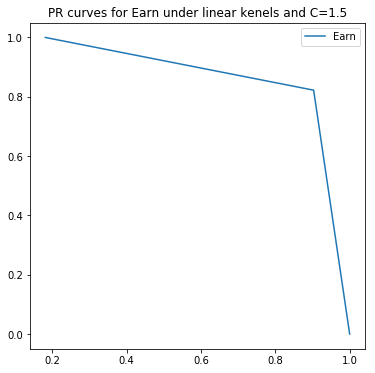

In [572]:
##Generate PR curves for Earn 
plt.figure(figsize=(6,6))
#1. Earn Vs everything else
#EARN of Xtd
svm_sim = svm.SVC(kernel="linear",C=0.15,gamma='auto')
svm_sim.fit(Xtd_tr,ytd_trEarn)
    
ytd_hatEarn = svm_sim.predict(Xtd_te)
fpr_dur, tpr_dur, threshs = metrics.precision_recall_curve(ytd_teEarn,ytd_hatEarn)
plt.plot(fpr_dur,tpr_dur,label='Earn')
plt.title("PR curves for Earn under linear kenels and C=1.5")
plt.gca().legend()


F1 for linear EARN: 0.6603518267929634
AUC for linear EARN: 0.7510226382094257


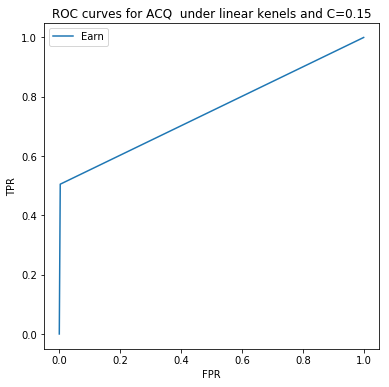

In [555]:
##Generate ROC curves for ACQ 
plt.figure(figsize=(6,6))
#1. Earn Vs everything else
#EARN of Xtd
svm_sim = svm.SVC(kernel="linear",C=0.15,gamma='auto')
svm_sim.fit(Xtd_tr,ytd_trEarn)
    
ytd_hatEarn = svm_sim.predict(Xtd_te)
fpr_dur, tpr_dur, threshs = metrics.roc_curve(ytd_teEarn,ytd_hatEarn)
plt.plot(fpr_dur,tpr_dur,label='Earn')
print('F1 for linear EARN:',metrics.f1_score(ytd_teEarn,ytd_hatEarn))
print('AUC for linear EARN:',metrics.roc_auc_score(ytd_teEarn,ytd_hatEarn))


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC curves for ACQ  under linear kenels and C=0.15")
plt.gca().legend()

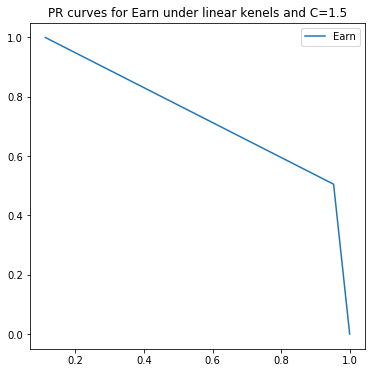

In [556]:
##Generate PR curves for ACQ 
plt.figure(figsize=(6,6))
#1. Earn Vs everything else
#EARN of Xtd
svm_sim = svm.SVC(kernel="linear",C=0.15,gamma='auto')
svm_sim.fit(Xtd_tr,ytd_trEarn)
    
ytd_hatEarn = svm_sim.predict(Xtd_te)
fpr_dur, tpr_dur, threshs = metrics.precision_recall_curve(ytd_teEarn,ytd_hatEarn)
plt.plot(fpr_dur,tpr_dur,label='Earn')
plt.title("PR curves for Earn under linear kenels and C=1.5")
plt.gca().legend()

Performance and tuning.

I tuned the papramenters based on EARN Vs all classification. First I split the dataset in to 80% , 20% train and test set. Then I split the train set to 80%, 20% as train and validation set. I used the MSE of the validation and training set to select the best parameters. Linear kernels outperformed all the other methods with C= 0.15 values. This resulted in the F1 = 0.9159 and AUC = 0.9447for EARN and F1 = 0.8153 and AUC = 0.8784 for ACQ. These are good enough values for the classification test. Then I performed the same classification using the second vectorizer as well. The observations were consistent. EARN has a better classification power compared to ACQ variable. This is evident by looking at the ROC curves. RBF and sigmoid kernels were ineffectibe for the case of ACQ variable. This may be because the parameters were tuned for EARN variable. For both variables the vectorizer sklearn.feature_extraction.text.CountVectorizer gave better features for classification.